# Alunos
- Jerônimo Ribeiro Costa Neto - 2120524
- Lucas Martins Caetano - 2120474
- Gilso Reinaldo - 2120645
- Weller Schwartz - 2120458


# Separação de Canais RGB
Separação de uma imagem em seus canais de cores (vermelho, verde e azul)

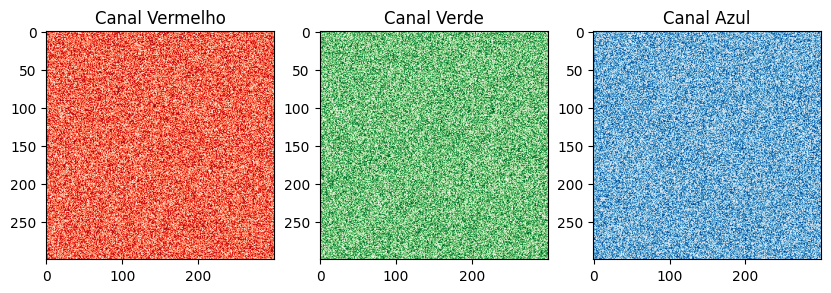

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# imagem aleatória
image = np.random.randint(0, 255, (300, 300, 3), dtype=np.uint8)

# Separar canais RGB
blue, green, red = cv2.split(image)

# Exibir os resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Canal Azul')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Canal Verde')

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Canal Vermelho')



plt.show()

# Pré-processamento de Imagem com câncer
 Pré-processamento e análise de câncer baseado em contagem de pixels claros.

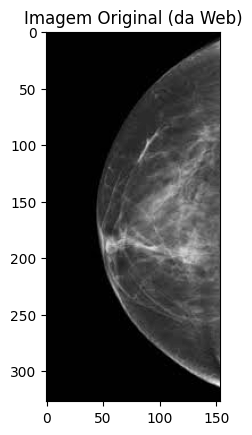

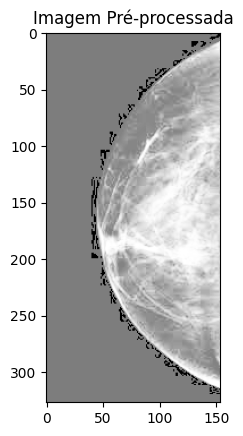

Porcentagem de pixels claros: 21.04%
Resultado da análise: Cancer detectado


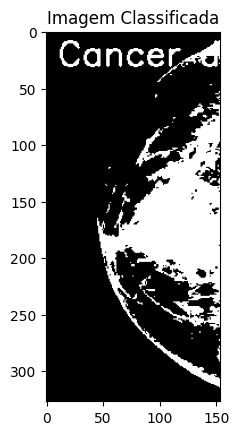

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Baixar imagem de uma URL
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_qdr8ZIXRQBqlI6WvshHRHCVEmWxJl5BSOyFpsgUzral_wFa2ouub9CXBUmSG87K84pU"  # Substitua pelo URL da imagem desejada
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Converter a imagem para grayscale (tons de cinza)
image = np.array(img.convert('L'))

# Exibir a imagem original
plt.imshow(image, cmap='gray')
plt.title('Imagem Original (da Web)')
plt.show()

# Equalização de histograma
equalized_image = cv2.equalizeHist(image)

# Exibir a imagem pré-processada
plt.imshow(equalized_image, cmap='gray')
plt.title('Imagem Pré-processada')
plt.show()

# Definir um limite para detectar pixels "claros" (acima de um certo valor)
threshold_value = 200
_, binary_image = cv2.threshold(equalized_image, threshold_value, 255, cv2.THRESH_BINARY)

# Contar pixels claros
white_pixels_count = np.sum(binary_image == 255)
total_pixels = image.size
percentage_of_white = (white_pixels_count / total_pixels) * 100

# Inferir a presença de câncer baseado no número de pixels brancos
if percentage_of_white > 5:
    result = "Cancer detectado"
else:
    result = "Ausente"

# Exibir resultado
print(f"Porcentagem de pixels claros: {percentage_of_white:.2f}%")
print(f"Resultado da análise: {result}")

# Exibir a imagem com a classificação
cv2.putText(binary_image, result, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Classificada')
plt.show()